In [ ]:
#Import Libraries
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

# The next two lines of codes help to avoid unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Loading the Training DataSet
df_train_1=pd.read_csv('Consumer_Complaints.csv')
df_train_1.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2015-10-14,Credit reporting,NaN,Incorrect information on credit report,Information is not mine,NaN,NaN,Equifax,GA,30134,NaN,Consent not provided,Web,2015-10-14,Closed with explanation,Yes,No,1605653
1,2015-04-26,Bank account or service,Other bank product/service,Deposits and withdrawals,NaN,RE : XXXX XXXX XXXX-PRIVILEGED AND CONFIDENTIA...,NaN,Wells Fargo & Company,GA,319XX,NaN,Consent provided,Web,2015-04-26,Closed with explanation,Yes,Yes,1347613
2,2013-12-20,Credit card,NaN,Other,NaN,NaN,NaN,Citibank,SC,29203,NaN,NaN,Phone,2014-01-03,Closed with non-monetary relief,Yes,No,640394
3,2016-03-03,Debt collection,"Other (i.e. phone, health club, etc.)",Disclosure verification of debt,Not given enough info to verify debt,NaN,Company has responded to the consumer and the ...,"FAIR COLLECTIONS & OUTSOURCING, INC.",OH,43082,NaN,NaN,Referral,2016-03-04,Closed with explanation,Yes,No,1815134
4,2015-01-30,Debt collection,Medical,Disclosure verification of debt,Not given enough info to verify debt,NaN,NaN,"HCFS Health Care Financial Services, Inc.",CA,90036,NaN,NaN,Web,2015-01-30,Closed with explanation,Yes,Yes,1218613


In [ ]:
# Analysis of Missing values in the Data

In [ ]:

df_train_1.isnull().sum()

Date received                        0
Product                              0
Sub-product                     103786
Issue                                0
Sub-issue                       219374
Consumer complaint narrative    302630
Company public response         290879
Company                              0
State                             2903
ZIP code                          2911
Tags                            308584
Consumer consent provided?      257230
Submitted via                        0
Date sent to company                 0
Company response to consumer         0
Timely response?                     0
Consumer disputed?                   0
Complaint ID                         0
dtype: int64

In [ ]:
# If Consumer consent provided? is empty, that means consent is not provided

df_train_1['Consumer consent provided?']=df_train_1['Consumer consent provided?'].fillna('Consent not provided')
df_train_1['Company public response']=df_train_1['Company public response'].fillna('Closed with explanation')
df_train_1=df_train_1.drop(['Tags','Consumer complaint narrative'],axis=1)
df_train_1.isnull().sum()

Date received                        0
Product                              0
Sub-product                     103786
Issue                                0
Sub-issue                       219374
Company public response              0
Company                              0
State                             2903
ZIP code                          2911
Consumer consent provided?           0
Submitted via                        0
Date sent to company                 0
Company response to consumer         0
Timely response?                     0
Consumer disputed?                   0
Complaint ID                         0
dtype: int64

In [ ]:
from collections import Counter

In [ ]:
dict1=Counter(np.array(df_train_1['ZIP code'].dropna()).tolist())
m=max(dict1.values())
k=''

for key,value in dict1.items():
    if(value==m ):
        df_train_1['ZIP code']=df_train_1['ZIP code'].fillna(key)
        
        


In [ ]:
dict1=Counter(np.array(df_train_1['State'].dropna()).tolist())
m=max(dict1.values())
k=''

for key,value in dict1.items():
    if(value==m ):
        df_train_1['State']=df_train_1['State'].fillna(key)

In [ ]:
df_train_1.isnull().sum()

Date received                        0
Product                              0
Sub-product                     103786
Issue                                0
Sub-issue                       219374
Company public response              0
Company                              0
State                                0
ZIP code                             0
Consumer consent provided?           0
Submitted via                        0
Date sent to company                 0
Company response to consumer         0
Timely response?                     0
Consumer disputed?                   0
Complaint ID                         0
dtype: int64

In [ ]:
df_train_1=df_train_1.drop(['Sub-product','Sub-issue'],axis=1)

In [ ]:
df_train_1.isnull().sum()

Date received                   0
Product                         0
Issue                           0
Company public response         0
Company                         0
State                           0
ZIP code                        0
Consumer consent provided?      0
Submitted via                   0
Date sent to company            0
Company response to consumer    0
Timely response?                0
Consumer disputed?              0
Complaint ID                    0
dtype: int64

In [ ]:
df_nullrem=df_train_1
df_nullrem.head()

,Date received,Product,Issue,Company public response,Company,State,ZIP code,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2015-10-14,Credit reporting,Incorrect information on credit report,Closed with explanation,Equifax,GA,30134,Consent not provided,Web,2015-10-14,Closed with explanation,Yes,No,1605653
1,2015-04-26,Bank account or service,Deposits and withdrawals,Closed with explanation,Wells Fargo & Company,GA,319XX,Consent provided,Web,2015-04-26,Closed with explanation,Yes,Yes,1347613
2,2013-12-20,Credit card,Other,Closed with explanation,Citibank,SC,29203,Consent not provided,Phone,2014-01-03,Closed with non-monetary relief,Yes,No,640394
3,2016-03-03,Debt collection,Disclosure verification of debt,Company has responded to the consumer and the ...,"FAIR COLLECTIONS & OUTSOURCING, INC.",OH,43082,Consent not provided,Referral,2016-03-04,Closed with explanation,Yes,No,1815134
4,2015-01-30,Debt collection,Disclosure verification of debt,Closed with explanation,"HCFS Health Care Financial Services, Inc.",CA,90036,Consent not provided,Web,2015-01-30,Closed with explanation,Yes,Yes,1218613


In [ ]:
# What is the number of unique values and most frequently occurring categories in the Categorical Columns?

In [ ]:
df_no_uniqueval=pd.DataFrame(df_nullrem.drop(['Date received','Complaint ID','Date sent to company'],axis=1).nunique())
df_no_uniqueval

,0
Product,12
Issue,95
Company public response,11
Company,3064
State,62
ZIP code,24181
Consumer consent provided?,4
Submitted via,6
Company response to consumer,6
Timely response?,2


In [ ]:
df_prod=pd.DataFrame(df_nullrem['Product'].value_counts().reset_index())
most_freq_prod=df_prod.head(n=1)['index'].tolist()[0]
most_freq_prod

'Mortgage'

In [ ]:
df_Issue=pd.DataFrame(df_nullrem['Issue'].value_counts().reset_index())
most_freq_Issue=df_Issue.head(n=1)['index'].tolist()[0]
most_freq_Issue

'Loan modification,collection,foreclosure'

In [ ]:
df_cpr=pd.DataFrame(df_nullrem['Company public response'].value_counts().reset_index())
most_freq_cpr=df_cpr.head(n=1)['index'].tolist()[0]
most_freq_cpr

'Closed with explanation'

In [ ]:
df_Company=pd.DataFrame(df_nullrem['Company'].value_counts().reset_index())
most_freq_Company=df_Company.head(n=1)['index'].tolist()[0]
most_freq_Company

'Bank of America'

In [ ]:
df_State=pd.DataFrame(df_nullrem['State'].value_counts().reset_index())
most_freq_State=df_State.head(n=1)['index'].tolist()[0]
most_freq_State

'CA'

In [ ]:
df_ZIP=pd.DataFrame(df_nullrem['ZIP code'].value_counts().reset_index())
most_freq_ZIP=df_ZIP.head(n=1)['index'].tolist()[0]
most_freq_ZIP

'300XX'

In [ ]:
df_ccp=pd.DataFrame(df_nullrem['Consumer consent provided?'].value_counts().reset_index())
most_freq_ccp=df_ccp.head(n=1)['index'].tolist()[0]
most_freq_ccp

'Consent not provided'

In [ ]:
df_sv=pd.DataFrame(df_nullrem['Submitted via'].value_counts().reset_index())
most_freq_sv=df_sv.head(n=1)['index'].tolist()[0]
most_freq_sv

'Web'

In [ ]:
df_crtc=pd.DataFrame(df_nullrem['Company response to consumer'].value_counts().reset_index())
most_freq_crtc=df_crtc.head(n=1)['index'].tolist()[0]
most_freq_crtc

'Closed with explanation'

In [ ]:
df_tr=pd.DataFrame(df_nullrem['Timely response?'].value_counts().reset_index())
most_freq_tr=df_tr.head(n=1)['index'].tolist()[0]
most_freq_tr

'Yes'

In [ ]:
df_cd=pd.DataFrame(df_nullrem['Consumer disputed?'].value_counts().reset_index())
most_freq_cd=df_cd.head(n=1)['index'].tolist()[0]
most_freq_cd

'No'

In [ ]:
# Can you identify the top issues raised by consumers in this dataset?

In [ ]:
top5_Issue=np.array(df_Issue.head()['index']).tolist()
top5_Issue

# These 5 are the top issues that come up

['Loan modification,collection,foreclosure',
 'Incorrect information on credit report',
 'Loan servicing, payments, escrow account',
 "Cont'd attempts collect debt not owed",
 'Account opening, closing, or management']

In [ ]:
# Are there some products which receive a higher number of complaints?

In [ ]:
prod_most_issue=np.array(df_prod.head()['index']).tolist()
prod_most_issue

# These 5 products have most complaints

['Mortgage',
 'Debt collection',
 'Credit reporting',
 'Credit card',
 'Bank account or service']

In [ ]:
# Do all the companies receive the same number of complaints?

In [ ]:
comp_most_issue=np.array(df_Company.head()['index']).tolist()
comp_most_issue

# These 5 companies have most complaints

['Bank of America',
 'Wells Fargo & Company',
 'JPMorgan Chase & Co.',
 'Equifax',
 'Experian']

In [ ]:
# How are the complaints submitted - through which medium?

In [ ]:
all_medium=np.array(df_sv['index']).tolist()
all_medium

# complaints are submitted through the following mediums

['Web', 'Referral', 'Phone', 'Postal mail', 'Fax', 'Email']

In [ ]:
# What is the geographical distribution of the complaints?

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


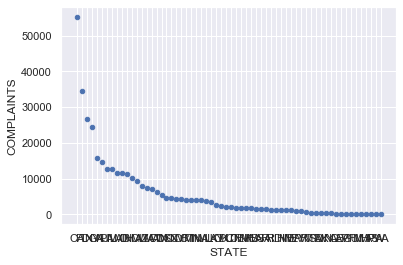

<Figure size 43200x21600 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

df_State.plot(x ='index', y='State', kind = 'scatter')
plt.xlabel('STATE')
plt.ylabel('COMPLAINTS')
plt.figure(figsize=(600,300))
plt.show()

In [ ]:
# Do the complaints rise in any specific month or day of the week?

In [ ]:
df_nullrem['Date received'] = pd.to_datetime(df_nullrem['Date received'])
df_nullrem.head()

,Date received,Product,Issue,Company public response,Company,State,ZIP code,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2015-10-14,Credit reporting,Incorrect information on credit report,Closed with explanation,Equifax,GA,30134,Consent not provided,Web,2015-10-14,Closed with explanation,Yes,No,1605653
1,2015-04-26,Bank account or service,Deposits and withdrawals,Closed with explanation,Wells Fargo & Company,GA,319XX,Consent provided,Web,2015-04-26,Closed with explanation,Yes,Yes,1347613
2,2013-12-20,Credit card,Other,Closed with explanation,Citibank,SC,29203,Consent not provided,Phone,2014-01-03,Closed with non-monetary relief,Yes,No,640394
3,2016-03-03,Debt collection,Disclosure verification of debt,Company has responded to the consumer and the ...,"FAIR COLLECTIONS & OUTSOURCING, INC.",OH,43082,Consent not provided,Referral,2016-03-04,Closed with explanation,Yes,No,1815134
4,2015-01-30,Debt collection,Disclosure verification of debt,Closed with explanation,"HCFS Health Care Financial Services, Inc.",CA,90036,Consent not provided,Web,2015-01-30,Closed with explanation,Yes,Yes,1218613


In [ ]:
df_temp=df_nullrem

In [ ]:
df_temp['Month']=df_temp['Date received'].dt.month_name()
df_temp['Year']=pd.DatetimeIndex(df_temp['Date received']).year
df_temp['Day']=df_temp['Date received'].dt.day_name()

In [ ]:
list_month=np.array(df_temp['Month']).tolist()
month_counter=Counter(list_month)
m_mon=max(month_counter.values())
max_complain_in=''

for key,value in month_counter.items():
    if(value==m_mon):
        max_complain_in=key
        
max_complain_in

# MAximum Number of complaints come in this month

'March'

In [ ]:
list_day=np.array(df_temp['Day']).tolist()
day_counter=Counter(list_day)
m_day=max(day_counter.values())
m_day

max_complain_day=''
for key,value in day_counter.items():
    if(value==m_day):
        max_complain_day=key
        
max_complain_day
# MAximum Number of complaints come in this day

'Wednesday'

In [ ]:
# How do companies respond to the complaints? What are the most common responses received?

In [ ]:
df_tr=pd.DataFrame(df_nullrem['Timely response?'].value_counts().reset_index())
response=np.array(df_tr['Timely response?']).tolist()
response

percent_timely_response=(response[0]/(response[0]+response[1]))*100
percent_timely_response

# The companies respond on time 98.29% of the times

98.29018143307042

In [ ]:
df_crtc=pd.DataFrame(df_nullrem['Company response to consumer'].value_counts().reset_index())
most_freq_crtc=df_crtc.head(n=1)['index'].tolist()[0]
most_freq_crtc
#This is the most common responses recieved

'Closed with explanation'

In [ ]:
# Does responding to complaints in a timely manner alter the number of consumers that
# disputed the company response and those that did not?

In [ ]:
df_timely_res_yes=df_nullrem[(df_nullrem['Timely response?']=='Yes') & (df_nullrem['Consumer disputed?']=='Yes')]
df_timely_res=df_nullrem[df_nullrem['Timely response?']=='Yes']

percent=(len(df_timely_res_yes)/len(df_timely_res))*100
percent

21.249875948110866

In [ ]:
# only 21.25 percent of the customers have disputed when a timely response was given
# from the above analysis we see that majority of customers have not disputed when a timely response was given